# Homework - SQL Programming

1. Use Google Colabortory and do your homework.
3. (In Google colaboratory) Before you submit your homework, restart kernel and run every cell!
4. Save (File->Save) the file
5. Submit your homework (this file) in Google classroom
6. **Don't forget to click "제출" button** ("Submit", "완료로 표시", 또는 "제출" 버턴을 누르지 않으면 제출된 것이 아님)
7. No late homeworks will be accepted for any reason!

To edit this cell, double click here
```
이름:_______________________
학번:_______________________
학과:_______________________
제출일:______________________
```

In [ ]:
%load_ext sql

In [ ]:
!pip install mysqlclient

### Use your host, id, password, and database

In [ ]:
import getpass
user = 's202300001'
password = getpass.getpass()
host='dm.hufs.ac.kr'
database = 's202300001db'
connection_string = f'mysql://{user}:{password}@{host}:3306/{database}'

%sql $connection_string

## Warning: Your companydb state MUST be clean as initial state

- Refer to jupyter notebook on "Chap_5_6_SQL_Labs.ipynb" (수업시간에  실습했던 쥬피터 노트북)

### 1. ssn이 '888665555'인 직원과 그 모든 직간접 부하직원의 이름과 '888665555'로 부터 부하직원에 이르는 경로를 출력한다. (s학번db(companydb) DB 사용, mysql recursive CTE 참조, Googling) (20점)

```
+---------------------+--------------------------------------------------------+
| ename               | path                                                   |
+---------------------+--------------------------------------------------------+
| James E. Borg       | James E. Borg                                          |
| Franklin T. Wong    | James E. Borg > Franklin T. Wong                       |
| John B. Smith       | James E. Borg > Franklin T. Wong > John B. Smith       |
| Joyce A. English    | James E. Borg > Franklin T. Wong > Joyce A. English    |
| Ramesh K. Narayan   | James E. Borg > Franklin T. Wong > Ramesh K. Narayan   |
| Jennifer S. Wallace | James E. Borg > Jennifer S. Wallace                    |
| Ahmad V. Jabbar     | James E. Borg > Jennifer S. Wallace > Ahmad V. Jabbar  |
| Alicia J. Zelaya    | James E. Borg > Jennifer S. Wallace > Alicia J. Zelaya |
+---------------------+--------------------------------------------------------+
```

In [ ]:
%%sql
/* YOUR CODE HERE */


### 2. 입력으로 주어진 ssn의 모든 직간접 부하직원을 찾으려 한다. 이를 수행하는 Java JDBC 코드를 작성한다. (60점)

**방법**: Common table supervisees에 해당하는  temporary table 'tempssn' (using MEMORY engine)을 사용한다. tempssn에 루프의 전 단계에서 삽입된 ssn과 EMPLOYEE 테이블을 조인하여 다음 단계의 부하직원을 찾는다. 다음 단계의 직원이 한 명도 없다면 루프를 끝낸다.

(**반드시 이 방법을 사용하여여 한다.**)</br>
(**반드시 이 방법을 사용하여여 한다.**)</br>
(**반드시 이 방법을 사용하여여 한다.**)</br>
(**반드시 이 방법을 사용하여여 한다.**)</br>
(**반드시 이 방법을 사용하여여 한다.**)</br>


- temporary table (using memory engine)를 사용하지 않으면 0점
- SQL 문장에서 "insert into ... select ..."를 사용하면 0점
- recursion을 사용하면 0점
- truncate를 사용하면 0점
- code의 indentation이 맞지 않으면 감점

테스트하기전에 반드시 아래 데이터를 삽입한다.

```SQL
insert into EMPLOYEE(fname, lname, ssn, superssn) values
    ('UUU', 'UUU', '000000001', '999887777'),
    ('VVV', 'VVV', '000000002', '000000001'),
    ('WWW', 'WWW', '000000003', '000000002'),
    ('XXX', 'XXX', '000000004', '000000003'),
    ('YYY', 'YYY', '000000005', '000000004'),
    ('ZZZ', 'ZZZ', '000000006', '000000005')
```

In [ ]:
%%sql

insert into EMPLOYEE(fname, lname, ssn, superssn) values
    ('UUU', 'UUU', '000000001', '999887777'),
    ('VVV', 'VVV', '000000002', '000000001'),
    ('WWW', 'WWW', '000000003', '000000002'),
    ('XXX', 'XXX', '000000004', '000000003'),
    ('YYY', 'YYY', '000000005', '000000004'),
    ('ZZZ', 'ZZZ', '000000006', '000000005')

**제출문**:
1. 자바 코드
2. 아래의 각 테스트 케이스에 해당하는 이클립스 또는 JavaIDE **전체** 스크린샷(ALT+PrintScreen). (반드시 IDE 전체 스크린샷을 첨부해야 한다)

- **CHEATING 발견시 모든 제출자의 점수를 "-만점"으로 처리함. (예 60점 만점이면 -60점)**

- **ChatGPT나 다른 인터넷에서 찾은 솔류션을 Copy하여 사용하면, 다수의 다른 학생들이 같은 방식으로 CHEATING하므로 모두 비슷한 코드로 나타난다. 직접적으로 타인의 코드를 복사하지 않아도 모두 CHAETING으로 간주된다.**

## Your Java Code
- To edit this cell, double click here
- ```java ... ```부분을 제거하지 말 것!!!

```java
// delete the following sample code before you insert your code
// copy&paste your java code here
import java.sql.*;
import javax.swing.JOptionPane;
import javax.swing.JPasswordField;
import java.io.*;

public class JDBCExample2 {
	public static void main (String args [])
	throws SQLException, IOException {
	    try
	    {
			// Connect to the database
	    Class.forName ("com.mysql.cj.jdbc.Driver");
			String host = "dm.hufs.ac.kr:3306/";
			String db= "s202300001db";
			String user = "s202300001";
			String password = getPassword();
		    Connection con = DriverManager.getConnection("jdbc:mysql://" + host + db + "?useSSL=false&serverTimezone=Asia/Seoul", user, password);

		    // Perform query using PreparedStatement
			// by providing SSN at run time
			String query = "select LNAME,SALARY from EMPLOYEE where SSN = ?";
			PreparedStatement pstmt = con.prepareStatement(query);
			String ssn = readEntry("Enter a Social Security Number: ");
			pstmt.clearParameters();
			pstmt.setString(1,ssn);
			ResultSet rset = pstmt.executeQuery();

			// Process the ResultSet
			if (rset.next ()) {
				String lname = rset.getString(1);
				double salary = rset.getDouble(2);
				System.out.println(lname + "'s salary is $" + salary);
			}
			else {
				System.out.println("No Employees whose ssn is " + ssn);
			}

			// Close objects
			rset.close();
			pstmt.close();
			con.close();
	    }
	    catch (SQLException ex)
	    {
	    	System.out.println("SQLException" + ex);
	    }
		catch (Exception ex)
		{
			System.out.println("Exception:" + ex);
		}
	}

	private static String getPassword() {
		final String password, message = "Enter password";
		if(System.console() == null)
		{
			  final JPasswordField pf = new JPasswordField();
			  password = JOptionPane.showConfirmDialog(null, pf, message,
					  JOptionPane.OK_CANCEL_OPTION,
					  JOptionPane.QUESTION_MESSAGE ) == JOptionPane.OK_OPTION ?
							  new String(pf.getPassword()) : "";
		}
		else
			password = new String(System.console().readPassword("%s> ", message ));
	  
		return password;
	}

	// ReadEntry function -- to read input string
	private static String readEntry(String prompt) {
		try {
			StringBuffer buffer = new StringBuffer();
			System.out.print(prompt);
			System.out.flush();
			int c = System.in.read();
			while (c != '\n' && c != -1) {
			buffer.append((char)c);
			c = System.in.read();
			}
			return buffer.toString().trim();
		} catch (IOException e) {
			return "";
		}
	}
}
```

이 CELL은 eclipse 스크린샷과 copy&paste 방법을  보여주기 위한 샘플임

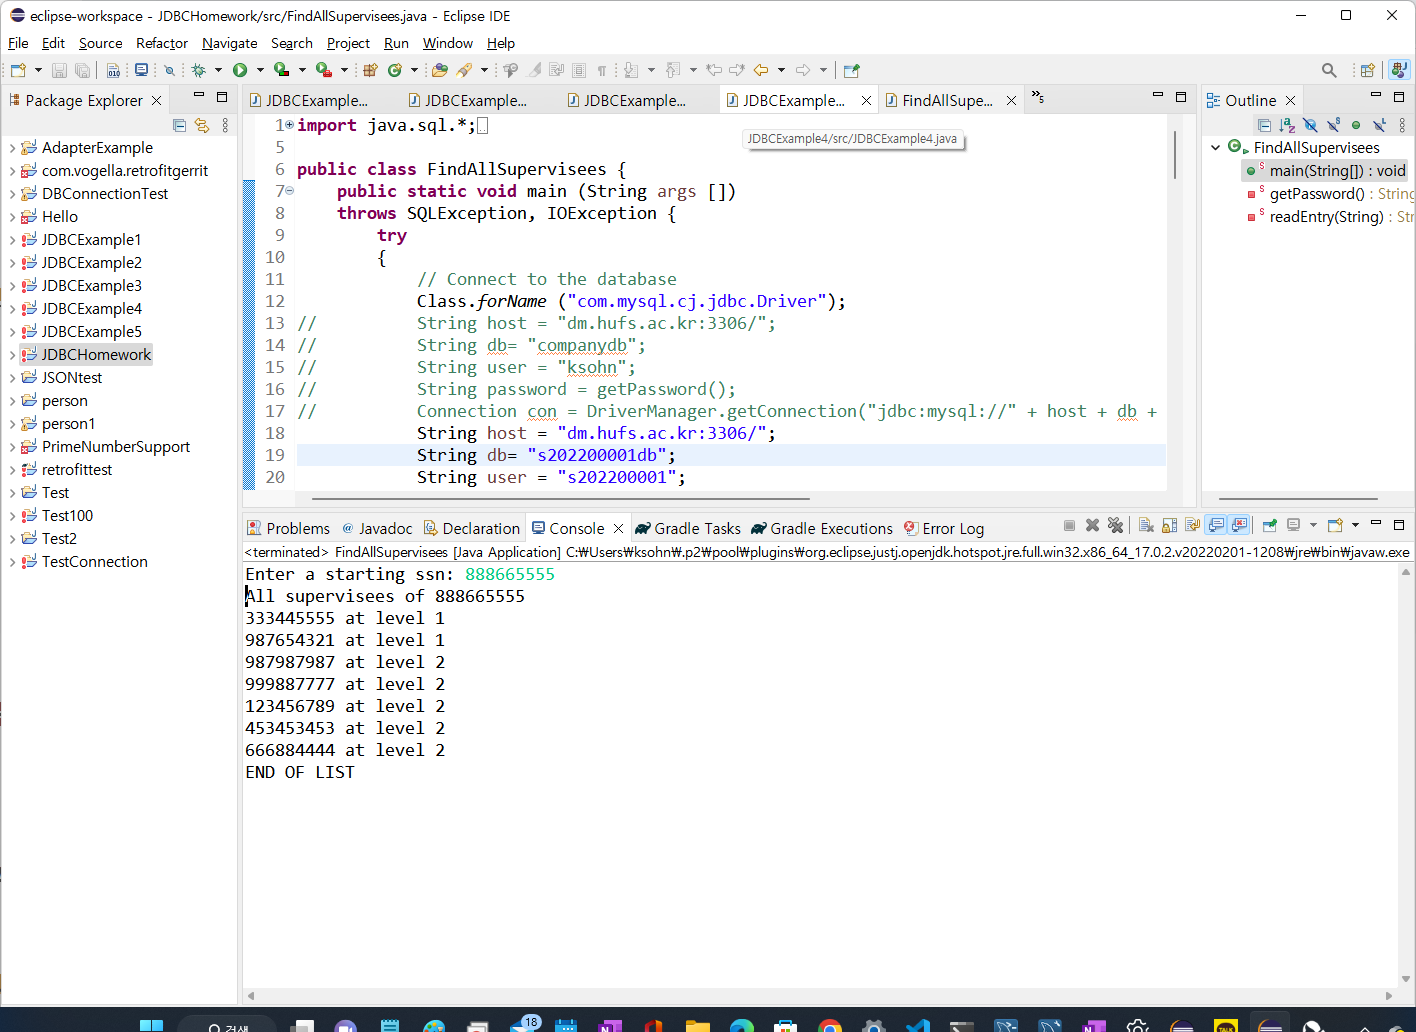


## Test Case SELF-CHECK: (Self-Check(자가 검증)을 반드시 표시해야 한다)

- 아래 CELL을 수정하여 성공한 경우,
#### Test Case 1: SUCCESS or FAIL? SUCCESS



- 실패한 경우,
#### Test Case 1: SUCCESS or FAIL? FAIL
로 표시한다.
- 다른 Testcase에 대해서도 같은 방식으로 표기한다.

## Test Case 1: SUCCESS or FAIL?
```
Enter a ssn: 888665555
333445555 at level 1
987654321 at level 1
123456789 at level 2
453453453 at level 2
666884444 at level 2
987987987 at level 2
999887777 at level 2
000000001 at level 3
000000002 at level 4
000000003 at level 5
000000004 at level 6
000000005 at level 7
000000006 at level 8
END OF LIST
```

**YOUR ANSWER for Test Case 1:**

- To edit this cell, double click here
- copy&paste your eclipse screenshot here
- copy&paste는 반드시 Google Colab에서 실행야 함(자신의 PC의 쥬피터 노트북에서 copy&paste한 것은 Google Colab에서 보이지 않음)
- 바로 아래 줄에 Paste (CTRL+V)


## Test Case 2: SUCCESS or FAIL?

```
Enter a ssn: 453453453
END OF LIST

```

**YOUR ANSWER for Test Case 2:**

- To edit this cell, double click here
- copy&paste your eclipse screenshot here
- copy&paste는 반드시 Google Colab에서 실행야 함(자신의 PC의 쥬피터 노트북에서 copy&paste한 것은 Google Colab에서 보이지 않음)
- 바로 아래 줄에 Paste (CTRL+V)

## Test Case 3: SUCCESS or FAIL?
```
Enter a ssn: 999887777
000000001 at level 1
000000002 at level 2
000000003 at level 3
000000004 at level 4
000000005 at level 5
000000006 at level 6
END OF LIST
```

**YOUR ANSWER for Test Case 3:**

- To edit this cell, double click here
- copy&paste your eclipse screenshot here
- copy&paste는 반드시 Google Colab에서 실행야 함(자신의 PC의 쥬피터 노트북에서 copy&paste한 것은 Google Colab에서 보이지 않음)
- 바로 아래 줄에 Paste (CTRL+V)



## Test Case 4: SUCCESS or FAIL?
```
Enter a ssn: 333445555
123456789 at level 1
453453453 at level 1
666884444 at level 1
END OF LIST
```

**YOUR ANSWER for Test Case 4:**

- To edit this cell, double click here
- copy&paste your eclipse screenshot here
- copy&paste는 반드시 Google Colab에서 실행야 함(자신의 PC의 쥬피터 노트북에서 copy&paste한 것은 Google Colab에서 보이지 않음)
- 바로 아래 줄에 Paste (CTRL+V)

